In [11]:
%matplotlib inline  

import sys, os, time, math
import cPickle as pickle
import tensorflow as tf
sys.path.append('/Users/matt.meng/dev/seq2seq_model')
from data import DataGenerator, process_batch
from utils import model_meta_file
from seq_model import _restore_placeholders, _restore_variables_for_inference, next_feed
from data_preprocess import TOKEN_DICT, _GO, _EOS
import matplotlib.pyplot as plt

In [10]:
%%bash
ls /Users/matt.meng/local_tensorflow_content/

NYDN_hybrid_model
large_32embed_256hid
large_32embed_64hid
seq2seq
seq2seq_64embed_128hid
sequence_model
sequence_model_non_scrambled_data
target_median_last_hid32_16-1_learning_rate_0.0001_MAE_fold_1
test
test_binary_model
test_special_0.0001_MAE_fold_1
word2vec


In [5]:
#pickle_file = 'processed_titles_data.pkl'
pickle_file = 'processed_titles_data.pkl'

local_model_path = '/Users/matt.meng/local_tensorflow_content/sequence_model_non_scrambled_data'

In [6]:
pickle_file_path = os.path.join(os.path.expanduser("~"), pickle_file)
with open(pickle_file_path, 'rb') as input_stream:
    data = pickle.load(input_stream)
titles = data['titles']
reverse_token_dict = data['reverse_token_dict']
title_urls = data['url']
title_pageViews = data['pageViw']

In [12]:
data.keys()

['url', 'reverse_token_dict', 'pageViw', 'titles', 'token_dict']

In [13]:
local_model_path

'/Users/matt.meng/local_tensorflow_content/sequence_model_non_scrambled_data'

In [18]:
dataGen = DataGenerator(pickle_file_path, dual_outputs=False)
batches = dataGen.generate_sequence(1)

In [23]:
#c_vector_list, h_vector_list = [], []
vector_dict, counter = {}, 0
saver = tf.train.import_meta_graph(model_meta_file(local_model_path))

#with tf.Session(config=config) as sess:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(local_model_path))
    placeholders, _ = _restore_placeholders(sess)
    mean_encoder_inputs_embedded_, mean_encoder_outputs_, final_cell_state_, final_hidden_state_ = _restore_variables_for_inference(sess)
    start_time = time.time()
    #for i in xrange(len(titles)):
    for i in xrange(100):
        counter += 1
        feed_content = next_feed(placeholders, batches, 1.)
        embeddings, mean_output, cell_state, hidden_state = sess.run([mean_encoder_inputs_embedded_, 
                                                                      mean_encoder_outputs_, 
                                                                      final_cell_state_, 
                                                                      final_hidden_state_], feed_content)
        
        print mean_output[0]
        if counter % 5000 == 0:
            print 'finish processing {} articles using {:.2f} seconds...'.format(counter, time.time() - start_time)

warning, more than one model meta file is found in /Users/matt.meng/local_tensorflow_content/sequence_model_non_scrambled_data
INFO:tensorflow:Restoring parameters from /Users/matt.meng/local_tensorflow_content/sequence_model_non_scrambled_data/models-600
[ 0.17409995  0.00444467 -0.0748111  -0.00306403  0.12011703  0.01430982
  0.18179616  0.01479011 -0.10633949  0.10608186 -0.05242899  0.02079578
 -0.0096436   0.23050871 -0.16795512  0.26598752 -0.03535434 -0.07605932
 -0.24362381 -0.07816307  0.06229756 -0.04906122  0.10528654 -0.16734718
  0.18422693  0.14248484  0.14321208  0.03064154 -0.11171551  0.23763809
  0.06863339  0.26042125 -0.17856067  0.06790717  0.16121282  0.16965255
 -0.10962293 -0.05659334  0.15833786  0.23231094 -0.07575268  0.31559715
 -0.28058526  0.00116052  0.07822227 -0.16963796 -0.27097362 -0.20882556
  0.11468983 -0.13434485  0.07774196 -0.00498767  0.11111412 -0.17744279
  0.06186398 -0.1129005   0.00903184  0.02264326 -0.0128642   0.15420532
 -0.08246668  

In [9]:
# the difference is caused by duplicate URLs
print len(title_pageViews), len(vector_dict)

115583 10000


In [10]:
key = vector_dict.keys()[10]
print vector_dict[key].keys()

['h_vectors', 'pageView', 'c_vectors', 'combined_vectors', 'title_string']


In [11]:
vector_items = vector_dict.items()

In [12]:
sorted_vecor = sorted(vector_items, key=lambda x: x[1]['pageView'], reverse=True)

In [13]:
sorted_vecor[10]

('http://www.msn.com/en-us/money/companies/harley-davidson-is-losing-its-cool/ar-BBEGRSQ',
 {'c_vectors': array([ -2.87905872e-01,  -1.06589878e+00,  -9.52594936e-01,
           9.51671898e-02,   1.52256203e+00,   3.29797089e-01,
           1.06658351e+00,   2.86686063e+00,   9.41939414e-01,
          -6.06732428e-01,   1.45999014e+00,   1.89112091e+00,
           7.98927844e-01,  -1.58887431e-02,  -5.05576394e-02,
           6.26731694e-01,   2.87634468e+00,  -3.01760125e+00,
          -2.24560547e+00,  -7.57605731e-02,  -2.18242455e+00,
          -6.85162425e-01,  -5.90069950e-01,  -5.28816767e-02,
          -5.01438379e-01,  -1.96293086e-01,  -8.50223675e-02,
          -1.42306805e+00,  -1.23170484e-03,   2.98776436e+00,
          -1.71672845e+00,  -5.80317616e-01,  -2.19294250e-01,
          -2.43660748e-01,   9.81259942e-02,  -7.16345757e-02,
           4.29816730e-03,   1.43022990e+00,  -2.70913649e+00,
           1.41635150e-01,  -1.71257377e-01,   1.64567184e+00,
          -1.7

In [14]:
#vector_dict['http://www.chicagotribune.com/lifestyles/sns-201706141112--tms--hscopebctnzz-a20170708-20170708-story.html']
#vector_dict['http://www.nbcdfw.com/news/politics/Trumps-New-Message-Man-Deletes-Inconvenient-Tweets-436065023.html']

In [14]:
def square_rooted(x):
    return math.sqrt(sum([a*a for a in x]))
 
def euclidean_distance(x,y):
     return math.sqrt(sum(math.pow(a - b, 2) for a, b in zip(x, y)))

def manhattan_distance(x,y): 
    return sum(abs(a - b) for a,b in zip(x,y))

def cosine_similarity(x, y):
    numerator = sum(a*b for a, b in zip(x,y))
    denominator = square_rooted(x) * square_rooted(y)
    #denominator = (square_rooted(x) + square_rooted(y))

    return numerator / denominator

In [15]:
index = 48
print sorted_vecor[index][1]['title_string']
selected_key = sorted_vecor[index][0]
print selected_key

tensions reach new high between trump gop
http://www.msn.com/en-us/news/politics/tensions-reach-new-high-between-trump-gop/ar-AAor3s3


In [16]:
#i = 400
#sorted_vecor[i][1]['vectors']

#### use `index` to loop through all the articles

In [17]:
#vector_name = 'h_vectors'
#vector_name = 'c_vectors'
vector_name = 'combined_vectors'

cosine_results, euclidean_results = [], []
#selected_key = 'http://www.cbssports.com/nba/news/nba-draft-lavar-ball-guarantees-lonzo-will-lead-lakers-to-playoffs-next-season/'
print selected_key
print '\n \n'
start_time = time.time()
#for i in xrange(len(sorted_vecor)):
for i in xrange(min(len(sorted_vecor), 100000)):
    if i == index:
        continue
    cosine_result = cosine_similarity(sorted_vecor[index][1][vector_name], sorted_vecor[i][1][vector_name])
    euclidean_result = euclidean_distance(sorted_vecor[index][1][vector_name], sorted_vecor[i][1][vector_name])
    cosine_results.append(cosine_result)
    euclidean_results.append(euclidean_result)
print 'all the process takes {:.2f} seconds...'.format(time.time() - start_time)

http://www.msn.com/en-us/news/politics/tensions-reach-new-high-between-trump-gop/ar-AAor3s3

 

all the process takes 3.40 seconds...


(array([  3.00000000e+00,   1.00000000e+00,   2.00000000e+01,
          3.60000000e+01,   5.60000000e+01,   9.80000000e+01,
          9.70000000e+01,   1.40000000e+02,   5.50000000e+01,
          3.50000000e+01,   5.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.00000000e+00,
          2.50000000e+01,   9.40000000e+01,   2.75000000e+02,
          4.15000000e+02,   3.76000000e+02,   2.55000000e+02,
          1.02000000e+02,   2.50000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   8.00000000e+00,
          1.03000000e+02,   3.50000000e+02,   7.58000000e+02,
          1.07100000e+03,   8.00000000e+02,   3.40000000e+02,
          5.09000000e+02,   1.24400000e+03,   1.65600000e+03,
          9.46000000e+02,   8.90000000e+01,   0.00000000e+00,
        

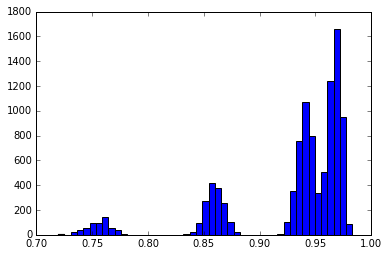

In [18]:
#plt.hist(euclidean_results, bins=50)
plt.hist(cosine_results, bins=50)

In [20]:
#cosine_results, euclidean_results = [], []

In [21]:
cosine_threshold = 0.98
euclidean_threshold = 4

'''
for i in xrange(len(euclidean_results)):
    if euclidean_results[i] < euclidean_threshold:
        print euclidean_results[i]
        print sorted_vecor[i][0], sorted_vecor[i][1]['title_string']
'''
print '\n \n'

#'''        
for i in xrange(len(cosine_results)):
    if cosine_results[i] > cosine_threshold:
        print cosine_results[i]
        print sorted_vecor[i][0], sorted_vecor[i][1]['title_string']
#'''


 

0.980979000298
http://www.10tv.com/article/woman-18-accused-burying-baby-alive woman ## accused of burying baby alive
0.980657694624
http://www.mirror.co.uk/sport/golf/the-open-2017-prize-money-10855855 the open #### prize money revealed
0.98040280446
http://www.wsbtv.com/news/local/gods-going-to-take-care-of-her-daughter-of-firefighter-hospitalized-after-skateboarding-accident/563192807 firefighter daughter hospitalized after _UNK fall
0.980765107866
http://myfox8.com/2017/07/28/2-arrested-in-alamance-county-kidnapping/ # arrested in alamance county kidnapping
0.980102384071
http://www.msn.com/en-us/money/realestate/10-waterfront-homes-under-dollar300000/ar-BBEj7ke ## waterfront homes under $### ###
0.980102384071
http://www.cnbc.com/video/3000637435 ibm misses top line
0.981281357106
http://www.wsbtv.com/news/local/showers-storms-ahead-for-friday-afternoon/574367627 showers storms ahead for friday afternoon
1.0
http://www.cbsnews.com/news/john-mccain-brain-tumor/?ftag=CNM-00-10aa

#### use the `key` to loop through all the titles

In [ ]:
results = []
#selected_key = 'http://www.cbssports.com/nba/news/nba-draft-lavar-ball-guarantees-lonzo-will-lead-lakers-to-playoffs-next-season/'
print selected_key
print '\n \n'
for key in vector_dict.keys():
    if key == selected_key:
        continue
    #vector_index = 0
    #cosine_result = cosine_similarity(vector_dict[selected_key]['vectors'][vector_index], vector_dict[key]['vectors'][vector_index])
    #euclidean_result = euclidean_distance(vector_dict[selected_key]['vectors'][vector_index], vector_dict[key]['vectors'][vector_index])
    #result = cosine_result
    start_time = time.time()
    cosine_result = cosine_similarity(vector_dict[selected_key]['vectors'], vector_dict[key]['vectors'])
    euclidean_result = euclidean_distance(vector_dict[selected_key]['vectors'], vector_dict[key]['vectors'])
    result = cosine_result
    print 'all the process takes {:.2f} seconds...'.format(time.time() - start_time)
    #result = euclidean_result
    #result = 10 * (1 - cosine_result) * euclidean_result
    #result = manhattan_distance(vector_dict[selected_key]['vectors'][0], vector_dict[key]['vectors'][0])
    #if result < 18:
    #if result > 0.92:
        #print key, result
        #print vector_dict[key]['pageView']
    
    #print cosine_result, euclidean_result, result
    results.append(result)

In [ ]:
plt.hist(results, bins=50)